Saving winequality-red.csv to winequality-red (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Mean: 10.432315428010792
Median: 10.2
Mode: 9.5
Variance: 1.170004073835

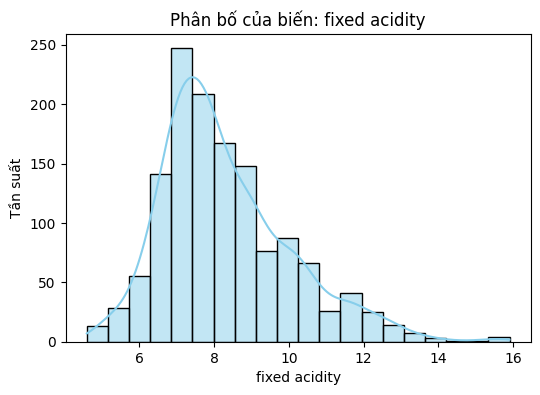

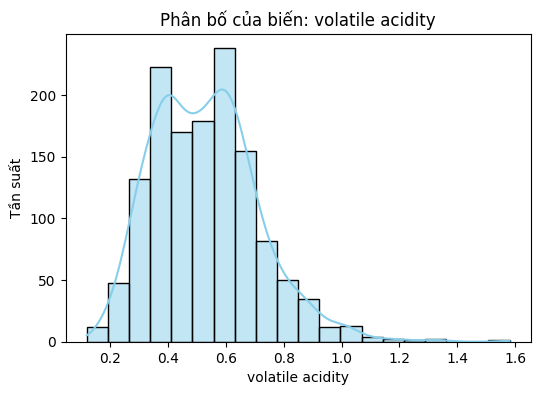

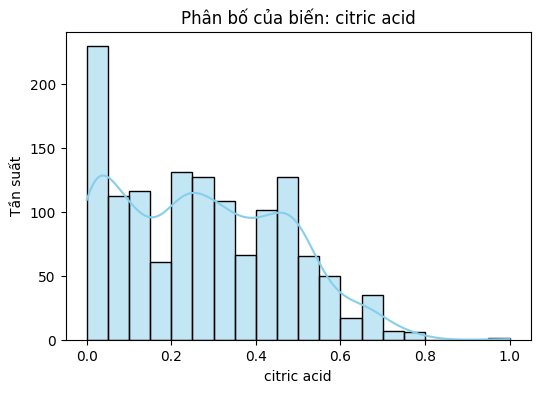

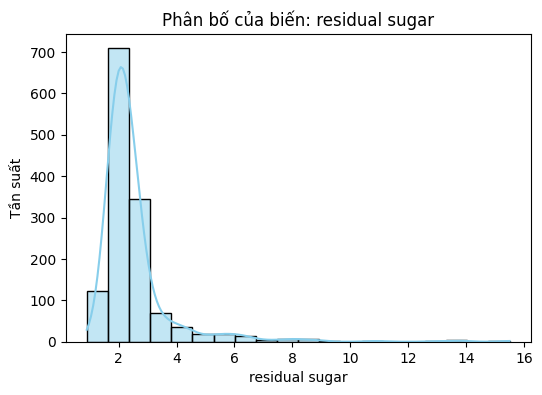

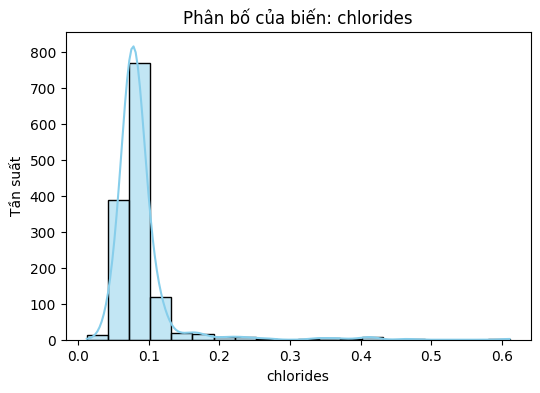

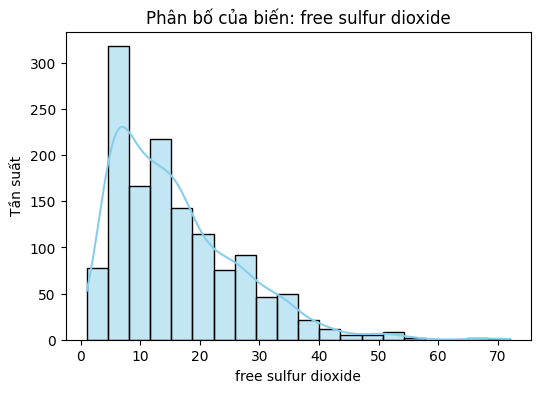

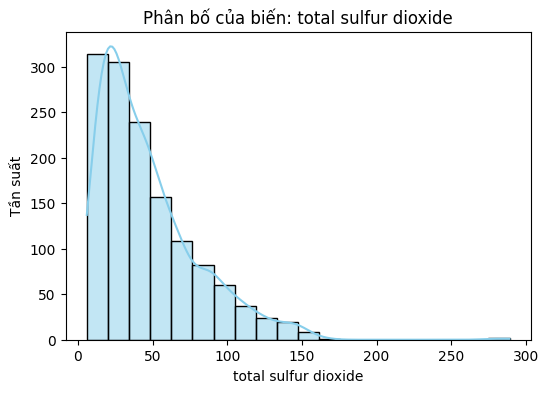

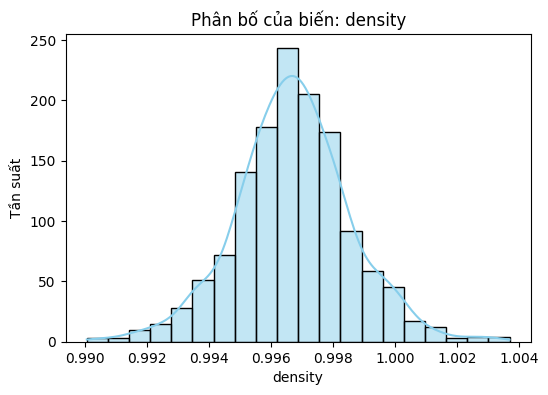

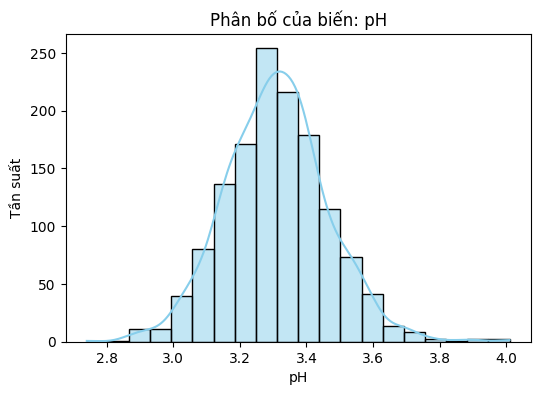

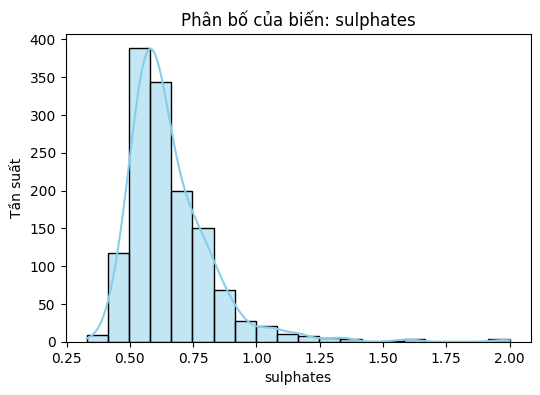

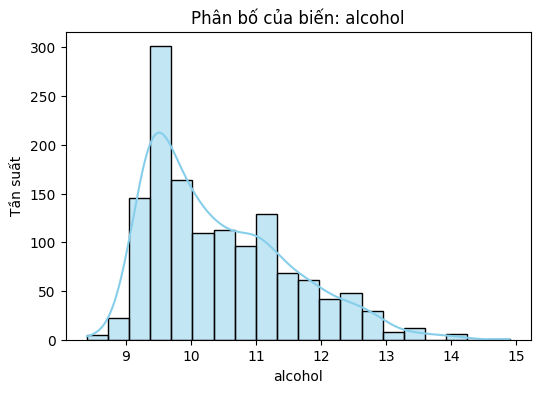

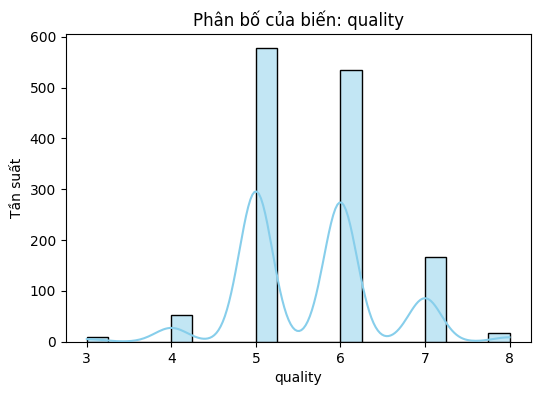

In [ ]:
#Code:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np # Import numpy
from scipy import stats # Import scipy.stats

wine_data = pd.read_csv("winequality-red.csv")

# Lọc các cột cần thiết
wine_data = wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar',
                       'chlorides','free sulfur dioxide','total sulfur dioxide','density',
                       'pH','sulphates','alcohol','quality']]
# Xem 5 dòng đầu tiên
wine_data.head()

# Kiểm tra thông tin tổng quát
wine_data.info()

# Kiểm tra dữ liệu trùng
wine_data.duplicated().sum()

# Loại bỏ dữ liệu trùng (nếu có)
wine_data = wine_data.drop_duplicates()

# Kiểm tra dữ liệu thiếu
wine_data.isnull().sum()

# Nếu có giá trị thiếu, có thể thay thế bằng trung bình
wine_data = wine_data.fillna(wine_data.mean(numeric_only=True))

# Kích thước bộ dữ liệu
wine_data.shape

# Mean (Trung bình)
alcohol_mean = np.mean(wine_data["alcohol"])

# Median (Trung vị)
alcohol_median = np.median(wine_data["alcohol"])

# Mode (Giá trị xuất hiện nhiều nhất)
alcohol_mode = stats.mode(wine_data["alcohol"], keepdims=True)

# Variance (Phương sai)
alcohol_variance = np.var(wine_data["alcohol"])

# Standard Deviation (Độ lệch chuẩn)
alcohol_std = np.std(wine_data["alcohol"])

# Max – Min – Range (Phạm vi biến thiên)
alcohol_max = np.max(wine_data["alcohol"])
alcohol_min = np.min(wine_data["alcohol"])
alcohol_range = alcohol_max - alcohol_min

# Percentile (Phần trăm vị)
alcohol_percentile_60 = np.percentile(wine_data["alcohol"], 60)

# Quartiles (Các tứ phân vị)
q1 = np.quantile(wine_data["alcohol"], 0.25)
q3 = np.quantile(wine_data["alcohol"], 0.75)

# IQR (Khoảng tứ phân vị)
alcohol_IQR = stats.iqr(wine_data["alcohol"])

# In kết quả
print("Mean:", alcohol_mean)
print("Median:", alcohol_median)
print("Mode:", alcohol_mode.mode[0])
print("Variance:", alcohol_variance)
print("Standard Deviation:", alcohol_std)
print("Range:", alcohol_range)
print("60th Percentile:", alcohol_percentile_60)
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", alcohol_IQR)

# Thống kê mô tả cho toàn bộ biến
wine_data.describe().T

# Kiểm tra phân bố của từng biến
import matplotlib.pyplot as plt
import seaborn as sns
for col in wine_data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(wine_data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Phân bố của biến: {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.show()

Saving diabetes.csv to diabetes (1).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Kiểu dữ liệu mỗi cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction 

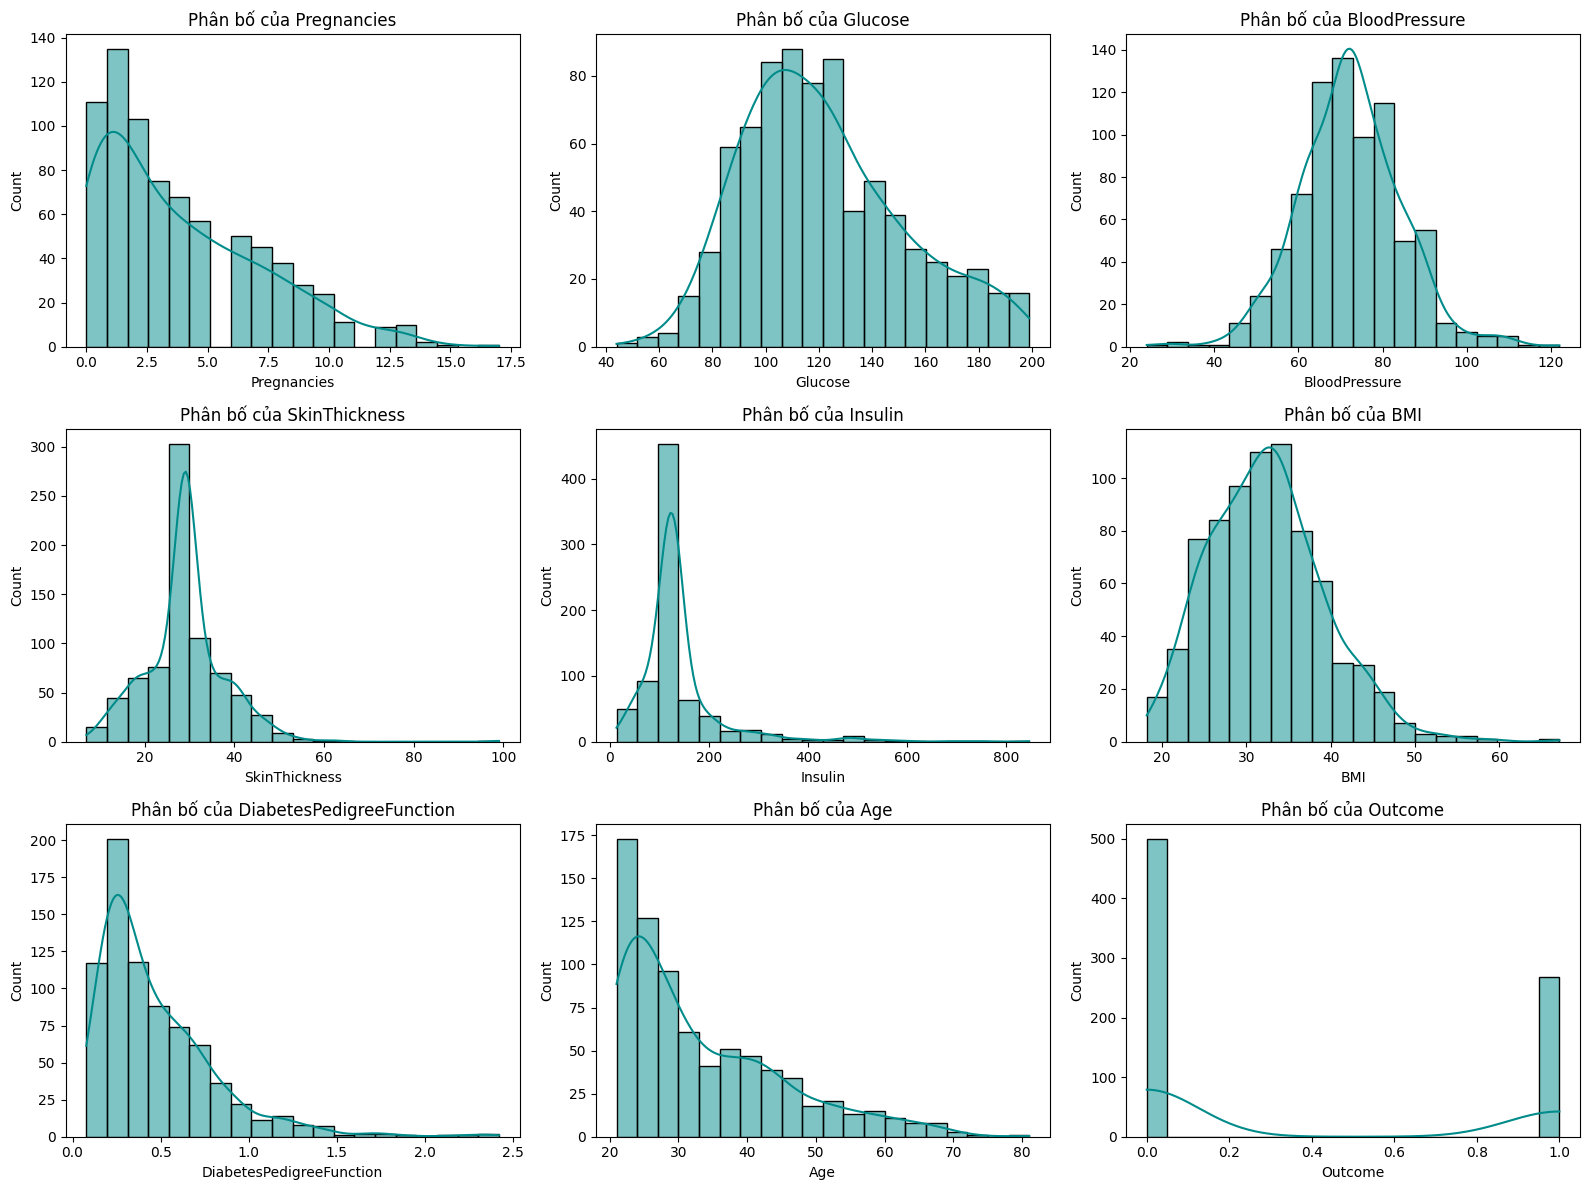

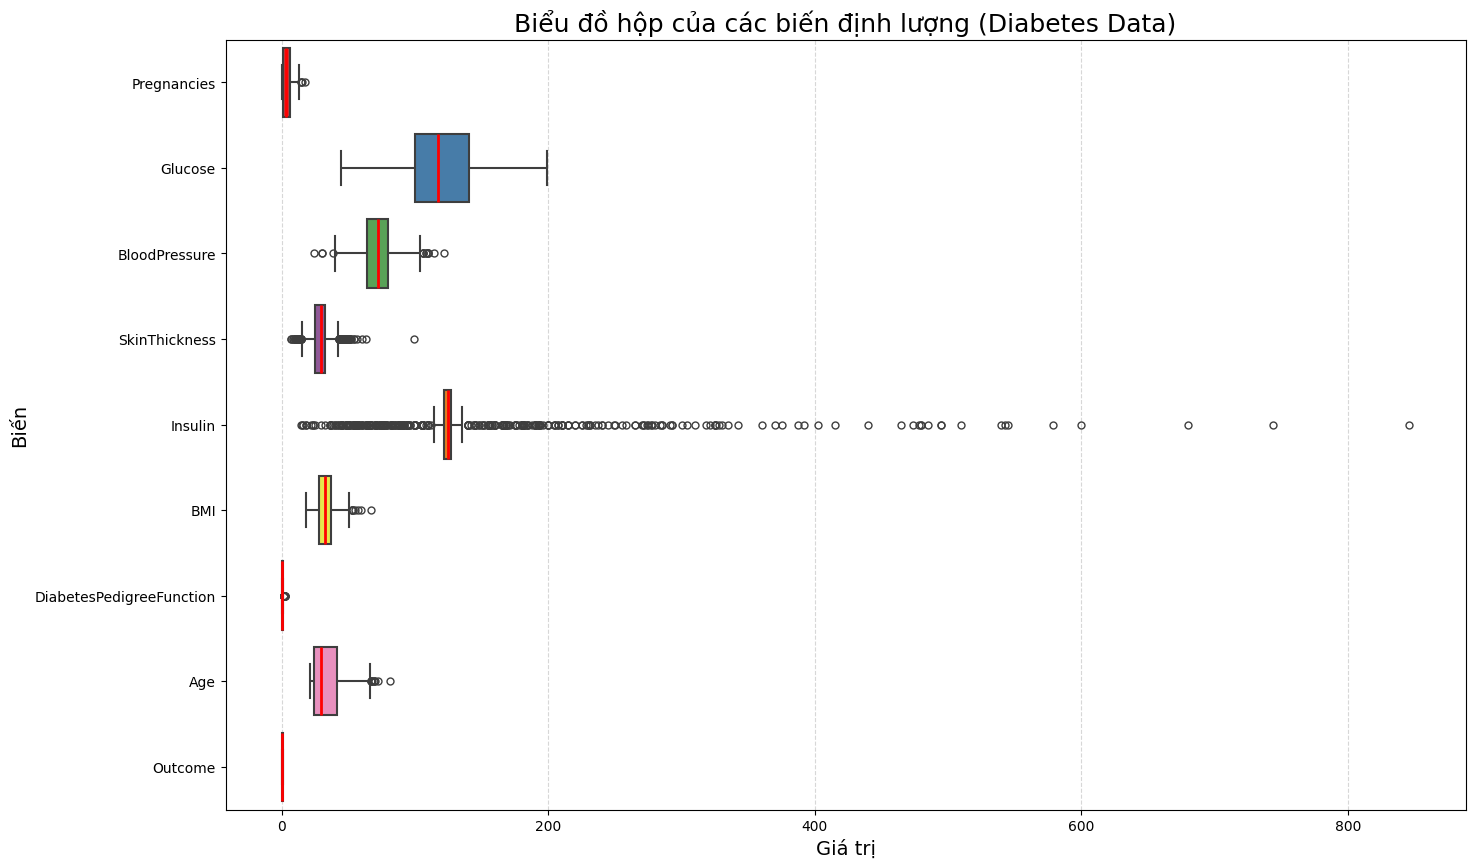

In [ ]:
#1.1.4
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats


data = pd.read_csv("diabetes.csv")
print(data.head(5))  ##Kiểm tra xem thử 5 dòng đầu tiên


#Xem kiểu dữ liệu và kích thước của data
print("Kiểu dữ liệu mỗi cột:")
print(data.dtypes)
print("\nKích thước dữ liệu (số dòng, số cột):", data.shape)


#Kiểm tra bản ghi trùng lặp
num_dup = data.duplicated().sum()
print("\nSố bản ghi trùng lặp:", num_dup)


#Kiểm tra số giá trị bằng 0 (Missing value giả định)
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\nSố lượng giá trị = 0 ở các cột nghi ngờ:")
print((data[cols_with_zero] == 0).sum())


#Tỷ lệ missing giả định
print("\n--- Tỷ lệ giá trị 0 (giả missing) theo phần trăm ---")
print(((data[cols_with_zero] == 0).sum() / len(data) * 100).round(2))


#Kiểm tra giá trị bị thiếu NaN
print("\nSố giá trị bị thiếu (NaN) từng cột:")
print(data.isnull().sum())


#XỬ LÝ GIÁ TRỊ = 0 (MISSING GIẢ)
#Thay giá trị 0 trong các cột nghi ngờ bằng giá trị trung vị (median)
for col in cols_with_zero:
    median_val = data[col][data[col] > 0].median()
    data[col] = data[col].replace(0, median_val)


print("\n Đã xử lý giá trị 0 (thay bằng median của từng biến).")
print(data[cols_with_zero].head())


#-------------------------------
#THỐNG KÊ MÔ TẢ
#-------------------------------


summary_stats = pd.DataFrame({ 'Mean': data.mean(), 'Median': data.median(), 'Mode': data.mode().iloc[0], 'Variance': data.var(), 'Std_Dev': data.std(), 'Min': data.min(), 'Max': data.max(), 'Range': data.max() - data.min(), 'Q1': data.quantile(0.25), 'Q2': data.quantile(0.50), 'Q3': data.quantile(0.75), 'IQR': data.quantile(0.75) - data.quantile(0.25) }).round(2)
print(summary_stats)


#KIỂM TRA PHÂN BỐ CỦA TỪNG BIẾN
print("\nVẽ biểu đồ phân bố (Histogram + KDE) cho từng biến:")


numeric_cols = data.columns.tolist()
plt.figure(figsize=(16, 12))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='darkcyan', bins=20)
    plt.title(f"Phân bố của {col}")


plt.tight_layout()
plt.show()


#VẼ BIỂU ĐỒ HỘP (BOXPLOT) ĐỂ XEM NGOẠI LAI
plt.figure(figsize=(16, 10))
sns.boxplot(data=data, orient='h', palette='pastel')
plt.title("Biểu đồ hộp của các biến định lượng")
plt.show()








shape: (1599, 12)


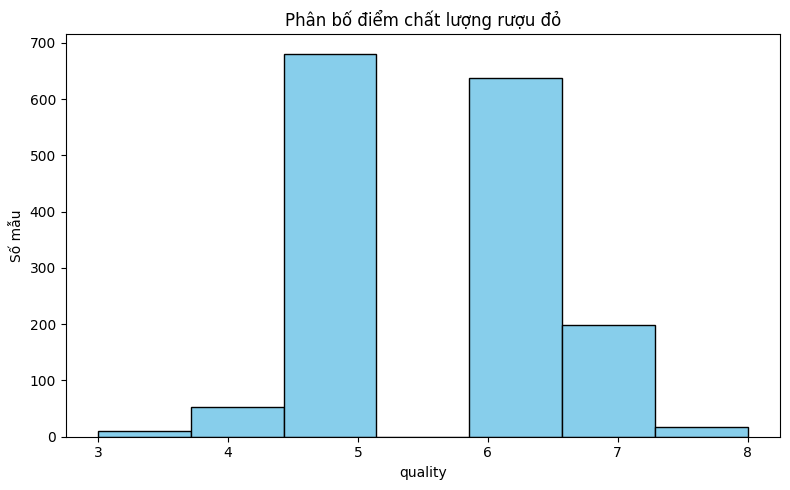

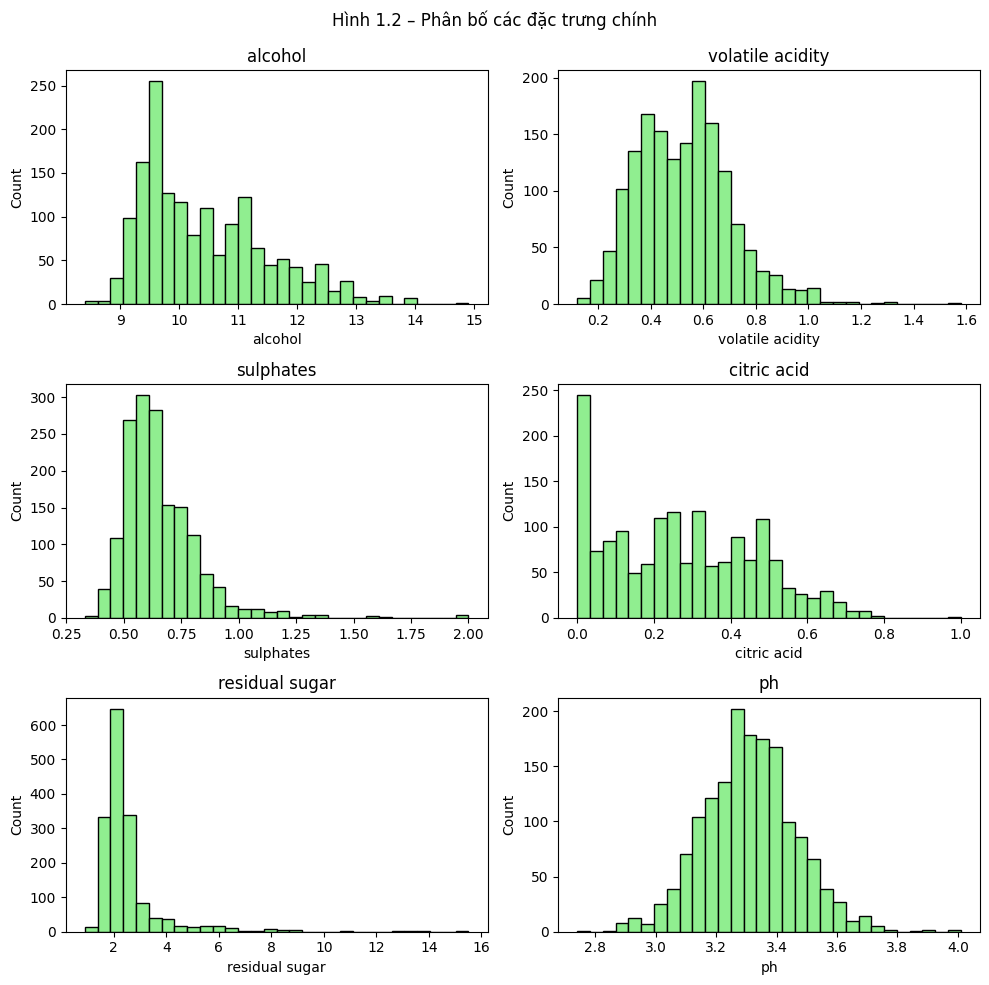

/tmp/ipython-input-3057787402.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=qs, patch_artist=True, boxprops=dict(facecolor='lightblue')) # Added patch_artist and boxprops


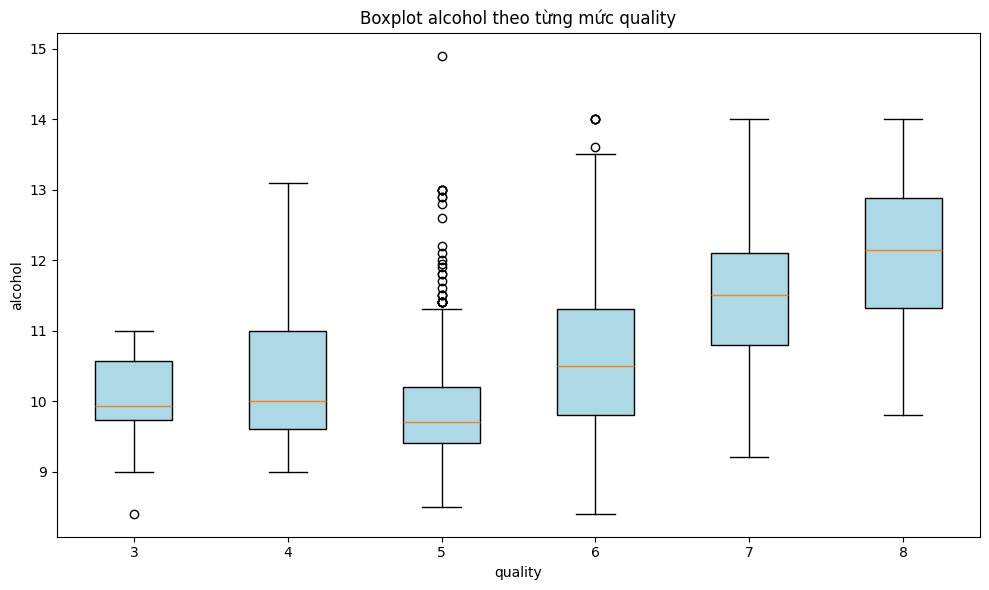

/tmp/ipython-input-3057787402.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="quality", y="volatile acidity", palette='viridis') # Changed palette


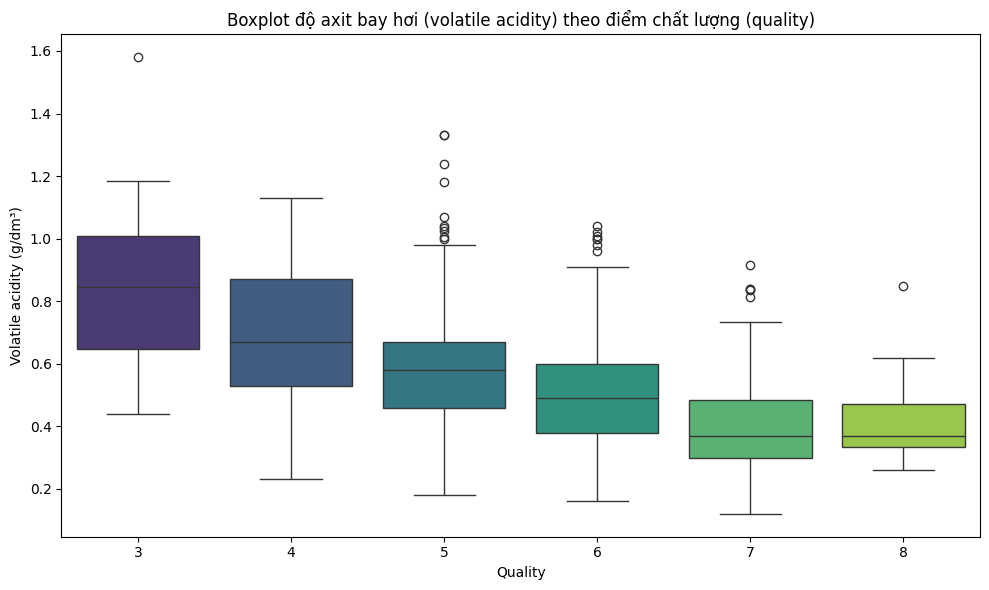

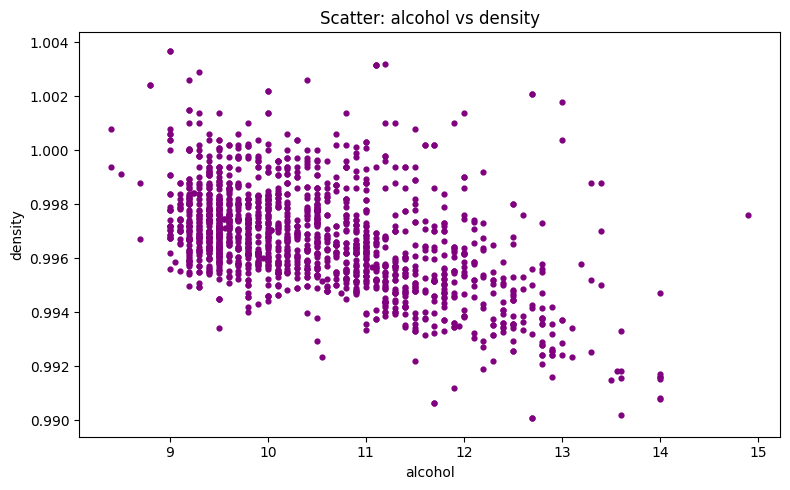

/tmp/ipython-input-3057787402.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.colorbar(); plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

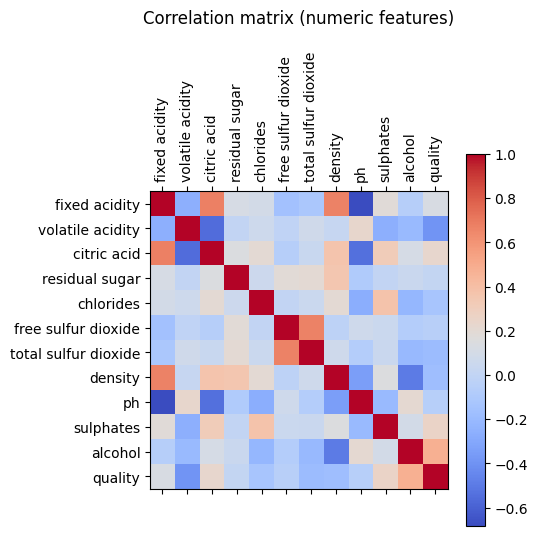

In [ ]:
#1.2.2
#Load & làm sạch
import pandas as pd, numpy as np, matplotlib.pyplot as plt
df = pd.read_csv("winequality-red.csv", sep=None, engine="python", encoding="utf-8-sig")
df.columns = (df.columns.str.replace("\ufeff","", regex=False).str.strip().str.lower())
print("shape:", df.shape)

# Hình 1.1: hist quality
plt.figure(figsize=(8,5))
plt.hist(df["quality"], bins=7, edgecolor="black", color='skyblue') # Changed color
plt.title("Phân bố điểm chất lượng rượu đỏ"); plt.xlabel("quality"); plt.ylabel("Số mẫu")
plt.tight_layout(); plt.savefig("Hinh_1_1_hist_quality.png", dpi=300, bbox_inches="tight"); plt.show()

#Hình 1.2: 6 histogram đặc trưng
features = ["alcohol","volatile acidity","sulphates","citric acid","residual sugar","ph"]
fig, ax = plt.subplots(3,2, figsize=(10,10)); ax=ax.ravel() # Changed to 3 rows, 2 columns
for i,c in enumerate(features):
    ax[i].hist(df[c].dropna(), bins=30, edgecolor="black", color='lightgreen') # Changed color
    ax[i].set_title(c); ax[i].set_xlabel(c); ax[i].set_ylabel("Count")
for j in range(len(features), len(ax)): fig.delaxes(ax[j])
fig.suptitle("Hình 1.2 – Phân bố các đặc trưng chính")
plt.tight_layout(); plt.subplots_adjust(top=0.92) # Adjusted top spacing
plt.savefig("Hinh_1_2_hist_features.png", dpi=300, bbox_inches="tight"); plt.show()

#Hình 1.3: boxplot alcohol ~ quality (Matplotlib)
qs = sorted(df["quality"].unique())
groups = [df.loc[df["quality"]==q, "alcohol"].dropna().values for q in qs]
plt.figure(figsize=(10,6))
plt.boxplot(groups, labels=qs, patch_artist=True, boxprops=dict(facecolor='lightblue')) # Added patch_artist and boxprops
plt.title("Boxplot alcohol theo từng mức quality"); plt.xlabel("quality"); plt.ylabel("alcohol")
plt.tight_layout(); plt.savefig("Hinh_1_3_box_alcohol_quality.png", dpi=300, bbox_inches="tight"); plt.show()

# Hình 1.4: boxplot volatile acidity ~ quality (Seaborn)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="quality", y="volatile acidity", palette='viridis') # Changed palette
plt.title("Boxplot độ axit bay hơi (volatile acidity) theo điểm chất lượng (quality)")
plt.xlabel("Quality"); plt.ylabel("Volatile acidity (g/dm³)")
plt.tight_layout(); plt.savefig("Hinh_1_4_box_va_quality.png", dpi=300, bbox_inches="tight"); plt.show()

#Hình 1.5a: scatter alcohol vs density
plt.figure(figsize=(8,5))
plt.scatter(df["alcohol"], df["density"], s=12, color='purple') # Changed color
plt.title("Scatter: alcohol vs density"); plt.xlabel("alcohol"); plt.ylabel("density")
plt.tight_layout(); plt.savefig("Hinh_1_5a_scatter_alcohol_density.png", dpi=300, bbox_inches="tight"); plt.show()

#Hình 1.5b: heatmap tương quan (Matplotlib)
num = df.select_dtypes(include=[np.number])
corr = num.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.matshow(corr, cmap='coolwarm'); plt.title("Correlation matrix (numeric features)", pad=20) # Changed cmap
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90); plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(); plt.tight_layout()
plt.savefig("Hinh_1_5b_corr_heatmap.png", dpi=300, bbox_inches="tight"); plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


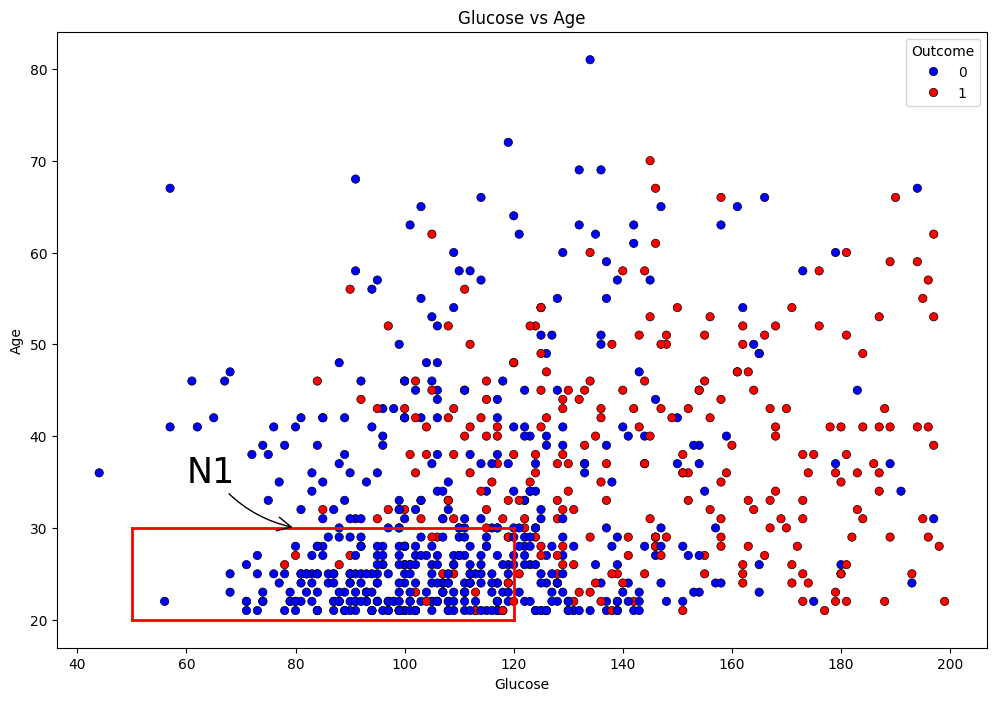

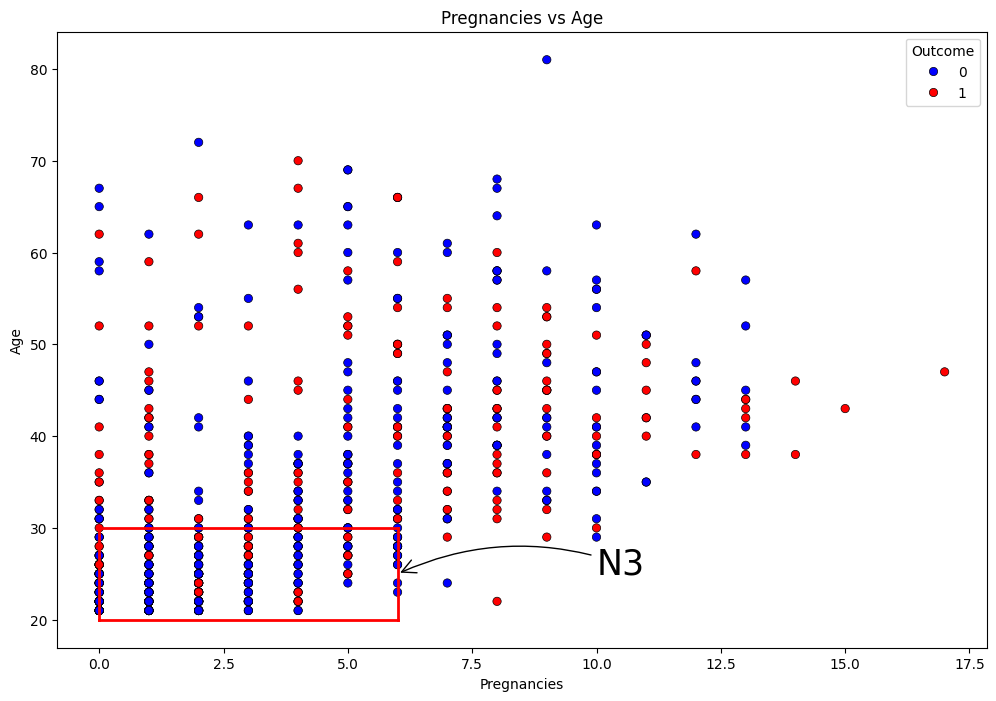

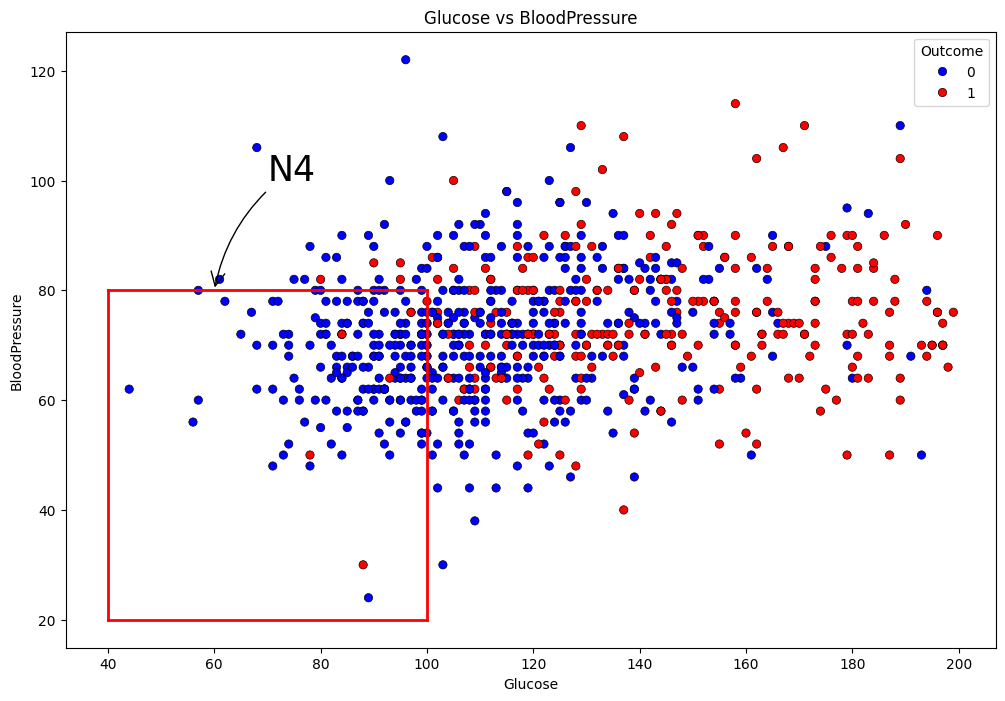

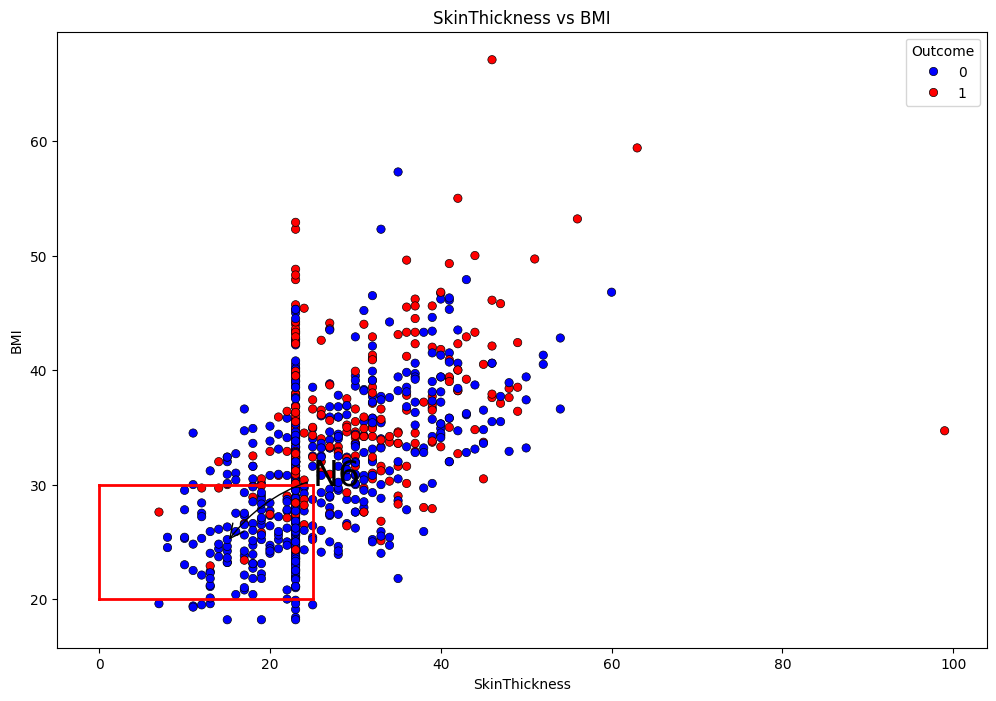

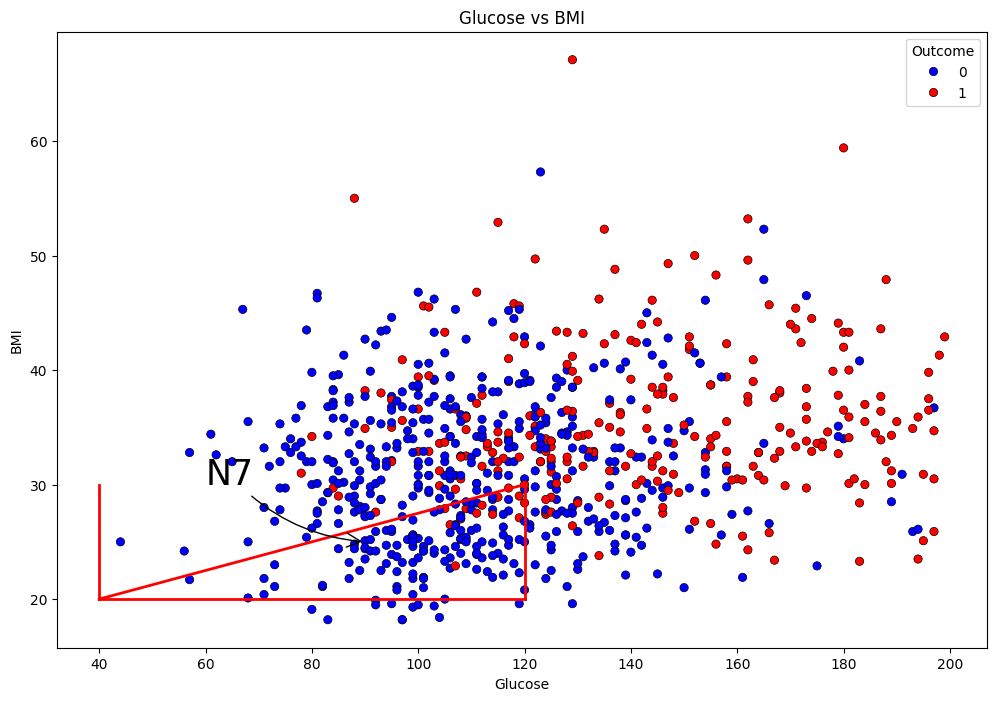

[LightGBM] [Info] Number of positive: 160, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 309, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517799 -> initscore=0.071228
[LightGBM] [Info] Start training from score 0.071228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


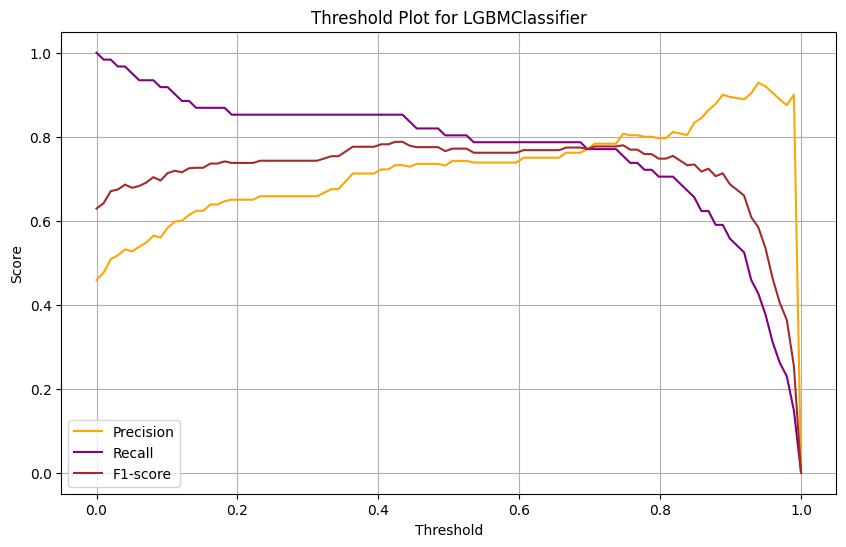

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

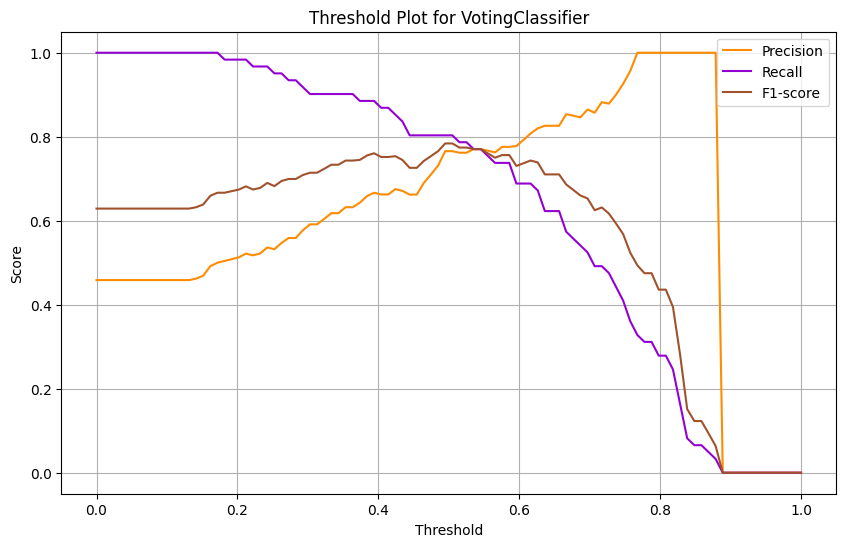

In [ ]:
# 1.2.3.1
# Tải và xem dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('diabetes.csv')

# Xem thông tin tổng quan
df.info()
df.head()

# Kiểm tra giá trị 0 bất hợp lý
# Kiểm tra số lượng giá trị 0 trong các cột
(df == 0).sum()

# Thay thế giá trị 0 bằng trung vị
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Tách biến độc lập (X) và mục tiêu (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chuyển lại về DataFrame cho dễ quan sát
X = pd.DataFrame(X_scaled, columns=X.columns)

# Kiểm tra lại dữ liệu sau xử lý
df.describe()

# Biểu đồ tán xạ với tiêu đề “Glucose vs Age”
palette = {0: 'blue', 1: 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(
    x=df['Glucose'],
    y=df['Age'],
    hue="Outcome",
    data=df,
    palette=palette,
    edgecolor=edgecolor
)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.2')) # Removed shrink

# Vẽ khung chữ nhật màu đỏ quanh vùng N1
plt.plot([50, 120], [30, 30], linewidth=2, color='red')
plt.plot([120, 120], [20, 30], linewidth=2, color='red')
plt.plot([50, 120], [20, 20], linewidth=2, color='red')
plt.plot([50, 50], [20, 30], linewidth=2, color='red')

plt.title('Glucose vs Age')
plt.show()

# Biểu đồ “Pregnancies vs Age”
palette = {0: 'blue', 1: 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(
    x=df['Pregnancies'],
    y=df['Age'],
    hue="Outcome",
    data=df,
    palette=palette,
    edgecolor=edgecolor
)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.2')) # Removed shrink

# Vẽ khung vùng N3 (màu đỏ)
plt.plot([0, 6], [30, 30], linewidth=2, color='red')
plt.plot([6, 6], [20, 30], linewidth=2, color='red')
plt.plot([0, 6], [20, 20], linewidth=2, color='red')
plt.plot([0, 0], [20, 30], linewidth=2, color='red')

plt.title('Pregnancies vs Age')
plt.show()

# Biểu đồ “Glucose vs BloodPressure (N4)”
palette = {0: 'blue', 1: 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax2 = sns.scatterplot(
    x=df['Glucose'],
    y=df['BloodPressure'],
    hue="Outcome",
    data=df,
    palette=palette,
    edgecolor=edgecolor
)

plt.annotate('N4', size=25, color='black', xy=(60, 80), xytext=(70, 100),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.2')) # Removed shrink

# Vẽ khung vùng N4 (màu đỏ)
plt.plot([40, 100], [80, 80], linewidth=2, color='red')
plt.plot([100, 100], [20, 80], linewidth=2, color='red')
plt.plot([40, 100], [20, 20], linewidth=2, color='red')
plt.plot([40, 40], [20, 80], linewidth=2, color='red')

plt.title('Glucose vs BloodPressure')
plt.show()

# Biểu đồ “SkinThickness vs BMI (N6)”
palette = {0: 'blue', 1: 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax6 = sns.scatterplot(
    x=df['SkinThickness'],
    y=df['BMI'],
    hue='Outcome',
    data=df,
    palette=palette,
    edgecolor=edgecolor
)

plt.annotate('N6', size=25, color='black', xy=(15, 25), xytext=(25, 30),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.2')) # Removed shrink

# Vẽ khung vùng N6
plt.plot([0, 25], [30, 30], linewidth=2, color='red')
plt.plot([25, 25], [20, 30], linewidth=2, color='red')
plt.plot([0, 25], [20, 20], linewidth=2, color='red')
plt.plot([0, 0], [20, 30], linewidth=2, color='red')

plt.title('SkinThickness vs BMI')
plt.show()

# Biểu đồ “Glucose vs BMI (N7)”
palette = {0: 'blue', 1: 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax7 = sns.scatterplot(
    x=df['Glucose'],
    y=df['BMI'],
    hue='Outcome',
    data=df,
    palette=palette,
    edgecolor=edgecolor
)

plt.annotate('N7', size=25, color='black', xy=(90, 25), xytext=(60, 30),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.2')) # Removed shrink

# Vẽ khung vùng N7
plt.plot([40, 120], [20, 30], linewidth=2, color='red')
plt.plot([120, 120], [20, 30], linewidth=2, color='red')
plt.plot([40, 120], [20, 20], linewidth=2, color='red')
plt.plot([40, 40], [20, 30], linewidth=2, color='red')

plt.title('Glucose vs BMI')
plt.show()

# Biểu đồ Threshold Plot for LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Giả sử bạn đã có data X, y (trong trường hợp của bạn là pima.csv)
# Ở đây mình minh họa tạm với dataset diabetes sẵn có
data = load_diabetes()
X, y = data.data, (data.target > 140).astype(int)  # tạo nhãn 0/1 giả lập

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình LightGBM
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Lấy xác suất dự đoán (proba của lớp 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Tạo dải threshold từ 0 đến 1
thresholds = np.linspace(0, 1, 100)

precisions = []
recalls = []
f1s = []

# Tính các chỉ số ở mỗi threshold
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='orange') # Changed color
plt.plot(thresholds, recalls, label='Recall', color='purple') # Changed color
plt.plot(thresholds, f1s, label='F1-score', color='brown') # Changed color
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Plot for LGBMClassifier')
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ Threshold Plot for VotingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Giả lập dữ liệu (trong thực tế bạn dùng dữ liệu thật, ví dụ diabetes.csv)
data = load_diabetes()
X, y = data.data, (data.target > 140).astype(int)  # tạo nhãn nhị phân giả lập

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo VotingClassifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

# Lấy xác suất dự đoán lớp 1
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Tạo các threshold từ 0 → 1
thresholds = np.linspace(0, 1, 100)
precisions, recalls, f1s = [], [], []

# Tính Precision, Recall, F1 theo từng threshold
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='darkorange') # Changed color
plt.plot(thresholds, recalls, label='Recall', color='darkviolet') # Changed color
plt.plot(thresholds, f1s, label='F1-score', color='sienna') # Changed color
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Plot for VotingClassifier')
plt.legend()
plt.grid(True)
plt.show()

Saving Online Retail.xlsx to Online Retail (1).xlsx
Kích thước dữ liệu: (541909, 8)

Các cột có trong dataset: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Số lượng giá trị thiếu ở mỗi cột:
 InvoiceNo           0
StockCode           0
Descriptio

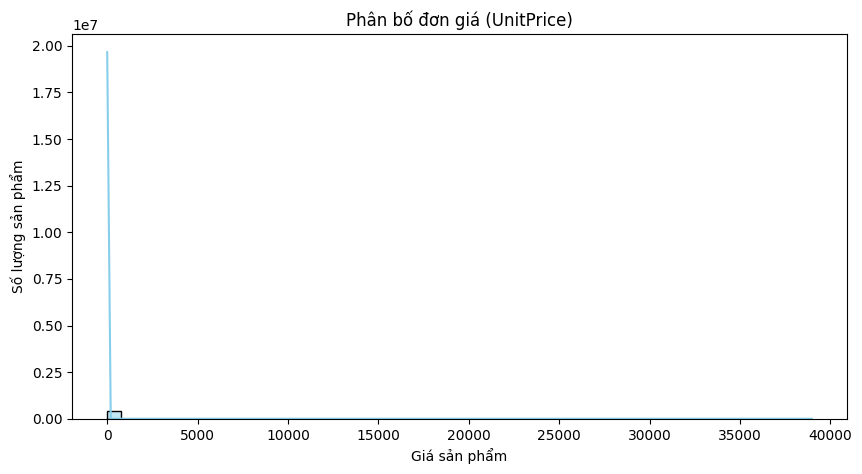

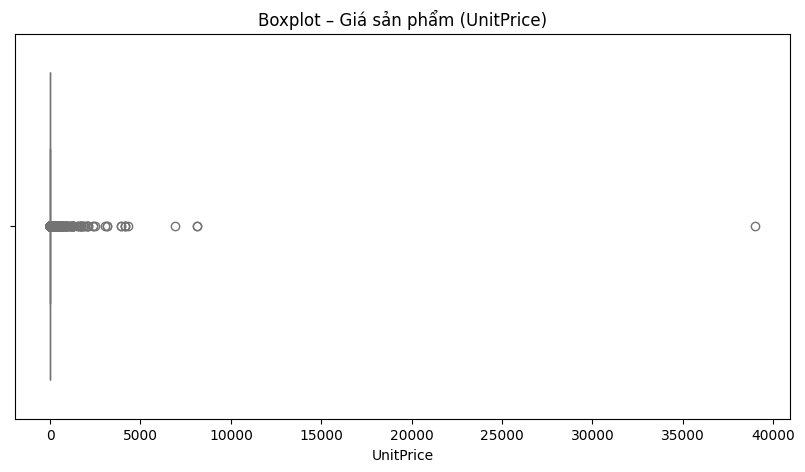

/tmp/ipython-input-2178743023.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.values, y=top_country.index, palette='viridis') # Changed palette


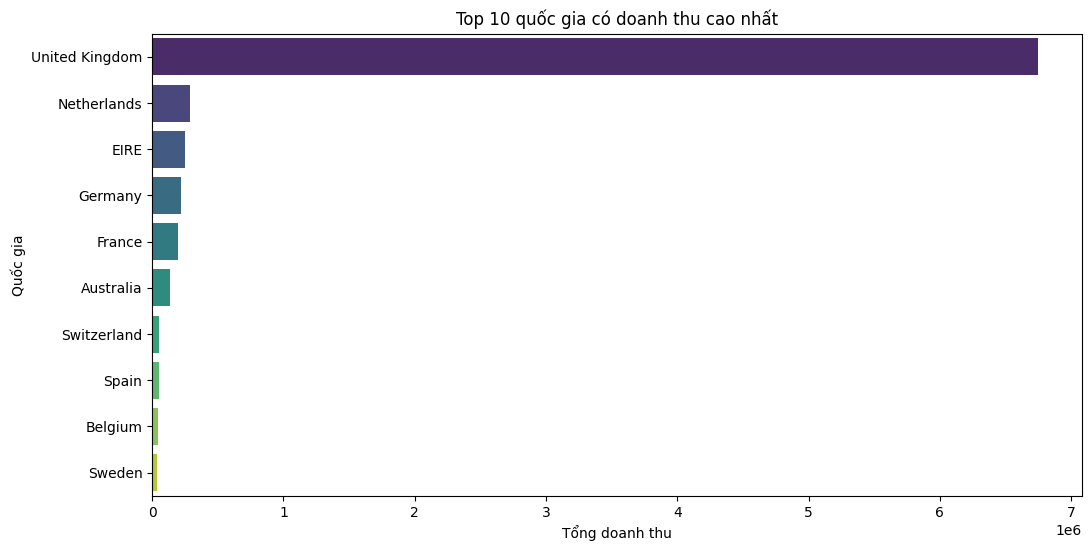

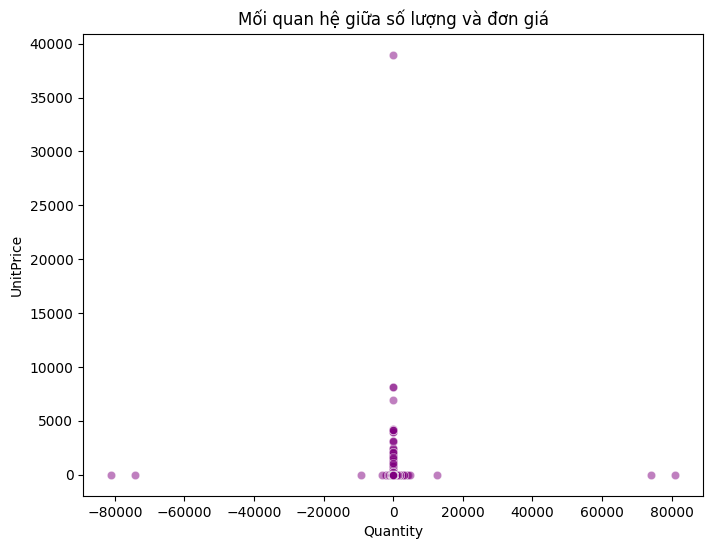

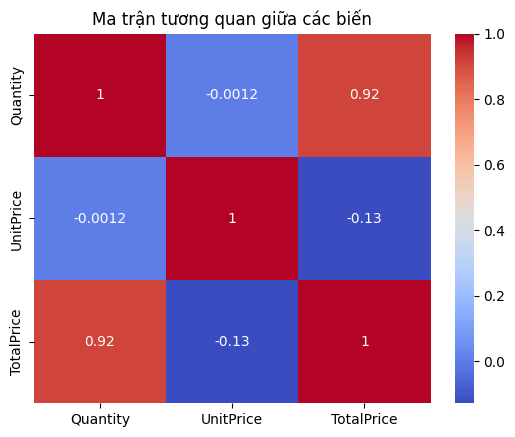

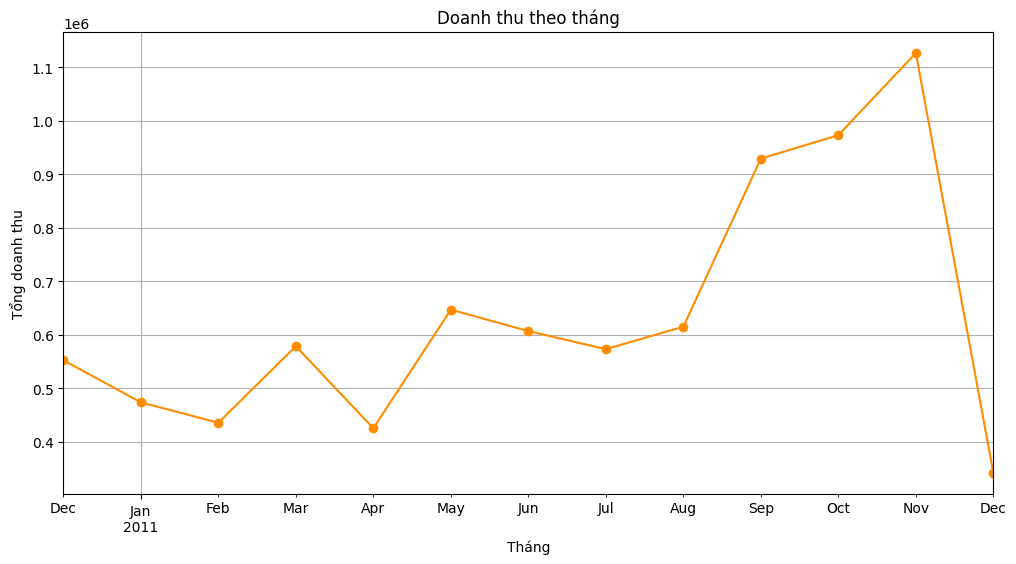

In [ ]:
#1.2.3.2
from google.colab import files
uploaded = files.upload()
import pandas as pd


df = pd.read_excel("Online Retail.xlsx")
df.head()
# Kích thước và thông tin tổng quan
print("Kích thước dữ liệu:", df.shape)
print("\nCác cột có trong dataset:", df.columns.tolist())


# Kiểu dữ liệu và giá trị null
df.info()
print("\nSố lượng giá trị thiếu ở mỗi cột:\n", df.isnull().sum())
# Loại bỏ các dòng không có CustomerID hoặc Description
df = df.dropna(subset=["CustomerID", "Description"])


# Loại bỏ trùng lặp
df = df.drop_duplicates()


# Tạo cột doanh thu (TotalPrice)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


print("Sau khi làm sạch, dữ liệu còn lại:", df.shape)
# Thống kê mô tả các biến số
df.describe()


# Tính thêm mean, median, mode cho các biến chính
import numpy as np
from scipy import stats


print("Mean UnitPrice:", np.mean(df["UnitPrice"]))
print("Median UnitPrice:", np.median(df["UnitPrice"]))
print("Mode UnitPrice:", stats.mode(df["UnitPrice"], keepdims=True)[0][0])
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
sns.histplot(df["UnitPrice"], bins=50, kde=True, color='skyblue') # Changed color
plt.title("Phân bố đơn giá (UnitPrice)")
plt.xlabel("Giá sản phẩm")
plt.ylabel("Số lượng sản phẩm")
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x=df["UnitPrice"], color='lightgreen') # Changed color
plt.title("Boxplot – Giá sản phẩm (UnitPrice)")
plt.show()


top_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))
sns.barplot(x=top_country.values, y=top_country.index, palette='viridis') # Changed palette
plt.title("Top 10 quốc gia có doanh thu cao nhất")
plt.xlabel("Tổng doanh thu")
plt.ylabel("Quốc gia")
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Quantity", y="UnitPrice", alpha=0.5, color='purple') # Changed color
plt.title("Mối quan hệ giữa số lượng và đơn giá")
plt.show()


# Tương quan
corr = df[["Quantity", "UnitPrice", "TotalPrice"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm") # Changed cmap
plt.title("Ma trận tương quan giữa các biến")
plt.show()


# Chuyển kiểu dữ liệu ngày
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


# Tạo biến tháng
df["Month"] = df["InvoiceDate"].dt.to_period("M")


# Doanh thu theo tháng
monthly_revenue = df.groupby("Month")["TotalPrice"].sum()


plt.figure(figsize=(12,6))
monthly_revenue.plot(kind="line", marker="o", color='darkorange') # Changed color
plt.title("Doanh thu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.grid(True)
plt.show()

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!pip install --quiet numpy==1.26.4 sweetviz==2.3.1 autoviz==0.1.905 openpyxl pandas matplotlib seaborn scikit-learn

import pandas as pd
import sweetviz as sv
from google.colab import files

uploaded = files.upload()  # upload marketing_campaign.csv

# TSV (tab-separated)
marketing_data = pd.read_csv("marketing_campaign.csv", sep="\t", encoding="latin1")
marketing_data.head()

report = sv.analyze(marketing_data)
report.show_html("marketing_report.html", open_browser=False)
print("Báo cáo đã được tạo: marketing_report.html")
files.download("marketing_report.html")

Saving marketing_campaign.csv to marketing_campaign.csv


                                             |          | [  0%]   00:00 -> (? left)

Report marketing_report.html was generated.
Báo cáo đã được tạo: marketing_report.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Kích thước dữ liệu: (2240, 29)


ID   Year_Birth  Education  Marital_Status  Income   Kidhome  Teenhome  \
0  5524     1957     Graduation      Single     58138.0     0         0      
1  2174     1954     Graduation      Single     46344.0     1         1      
2  4141     1965     Graduation    Together     71613.0     0         0      
3  6182     1984     Graduation    Together     26646.0     1         0      
4  5324     1981            PhD     Married     58293.0     1         0      

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012    58        635       88            546              172         
1  08-03-2014    38         11        1              6                2         
2  21-08-2013    26        426       49            127              111         
3  10-02-2014    26         11        4             20               10         
4  19-01-2014    94        173       43            118               46         

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0         88              88               3                 8          
1          1               6               2                 1          
2         21              42               1                 8          
3          3               5               2                 2          
4         27              15               5                 5          

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0          10                   4                  7                0        
1           1                   2                  5                0        
2           2                  10                  4                0        
3           0                   4                  6                0        
4           3                   6                  5                0        

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        0             0             0             0           0      
1        0             0             0             0           0      
2        0             0             0             0           0      
3        0             0             0             0           0      
4        0             0             0             0           0      

   Z_CostContact  Z_Revenue  Response  
0        3           11          1     
1        3           11          0     
2        3           11          0     
3        3           11          0     
4        3           11          0

Shape of your Data Set loaded: (2240, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  15
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  7
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  2
    29 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID', 'Z_CostContact', 'Z_Revenue']
To fix these data quality issu

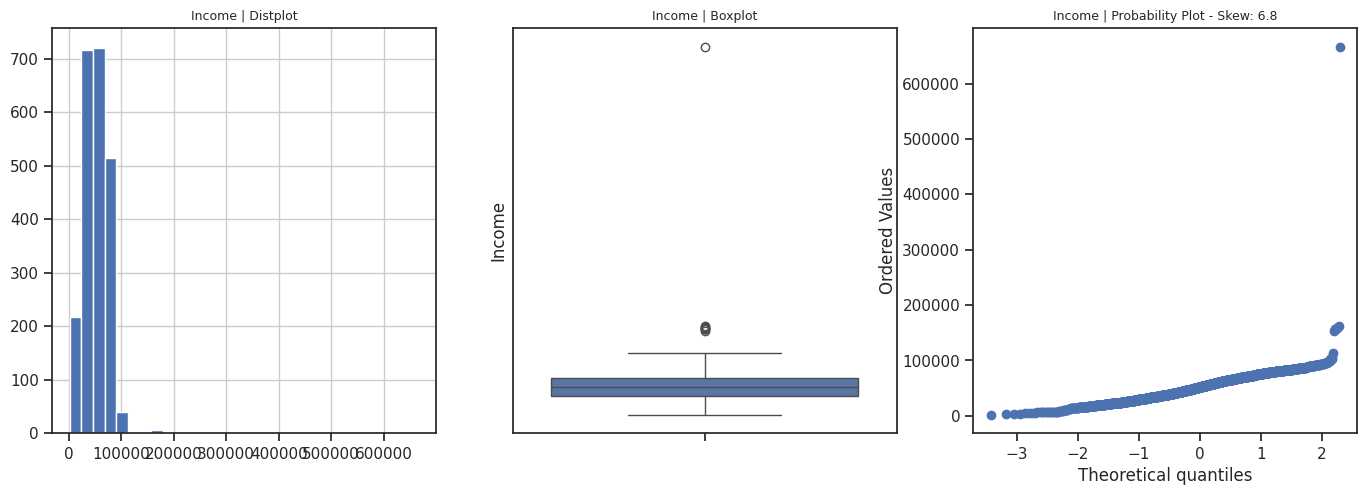

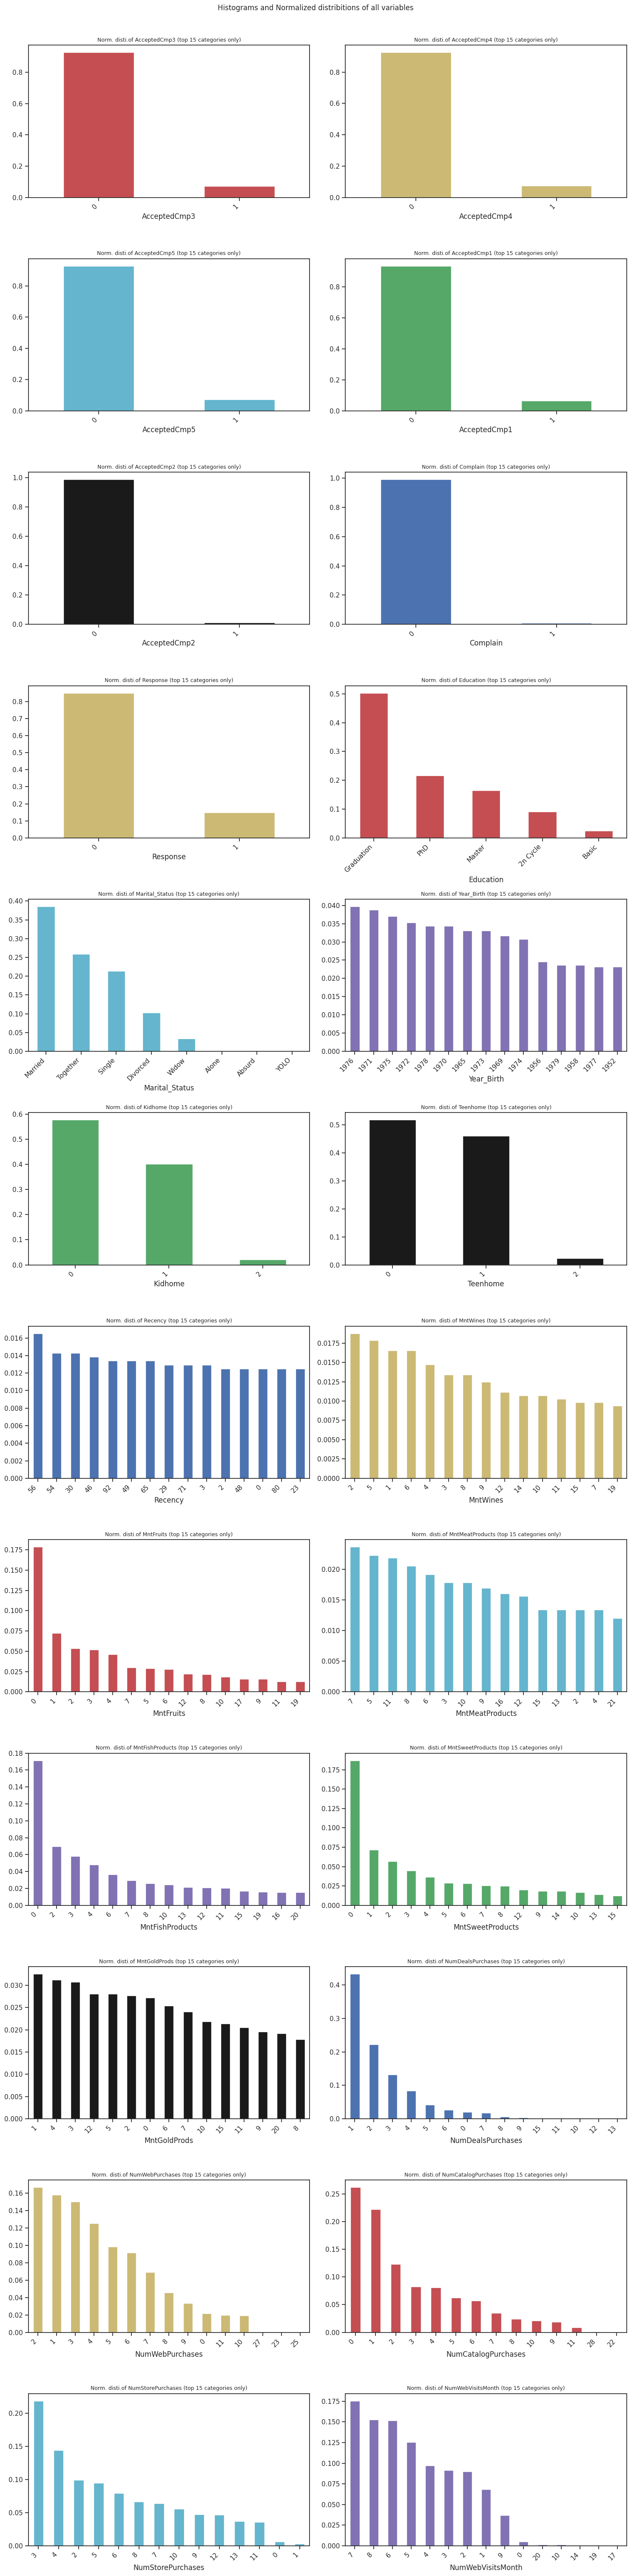

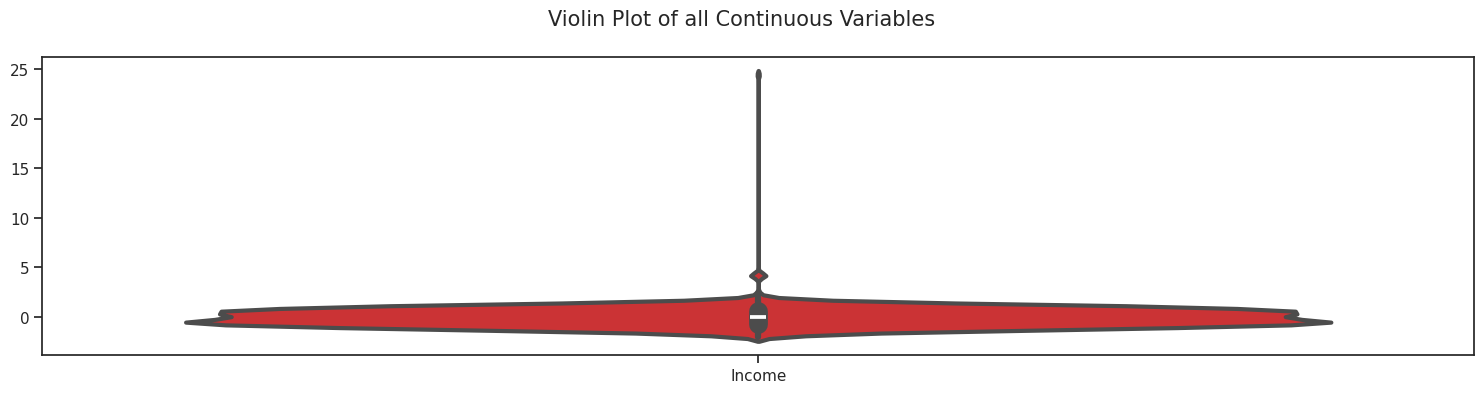

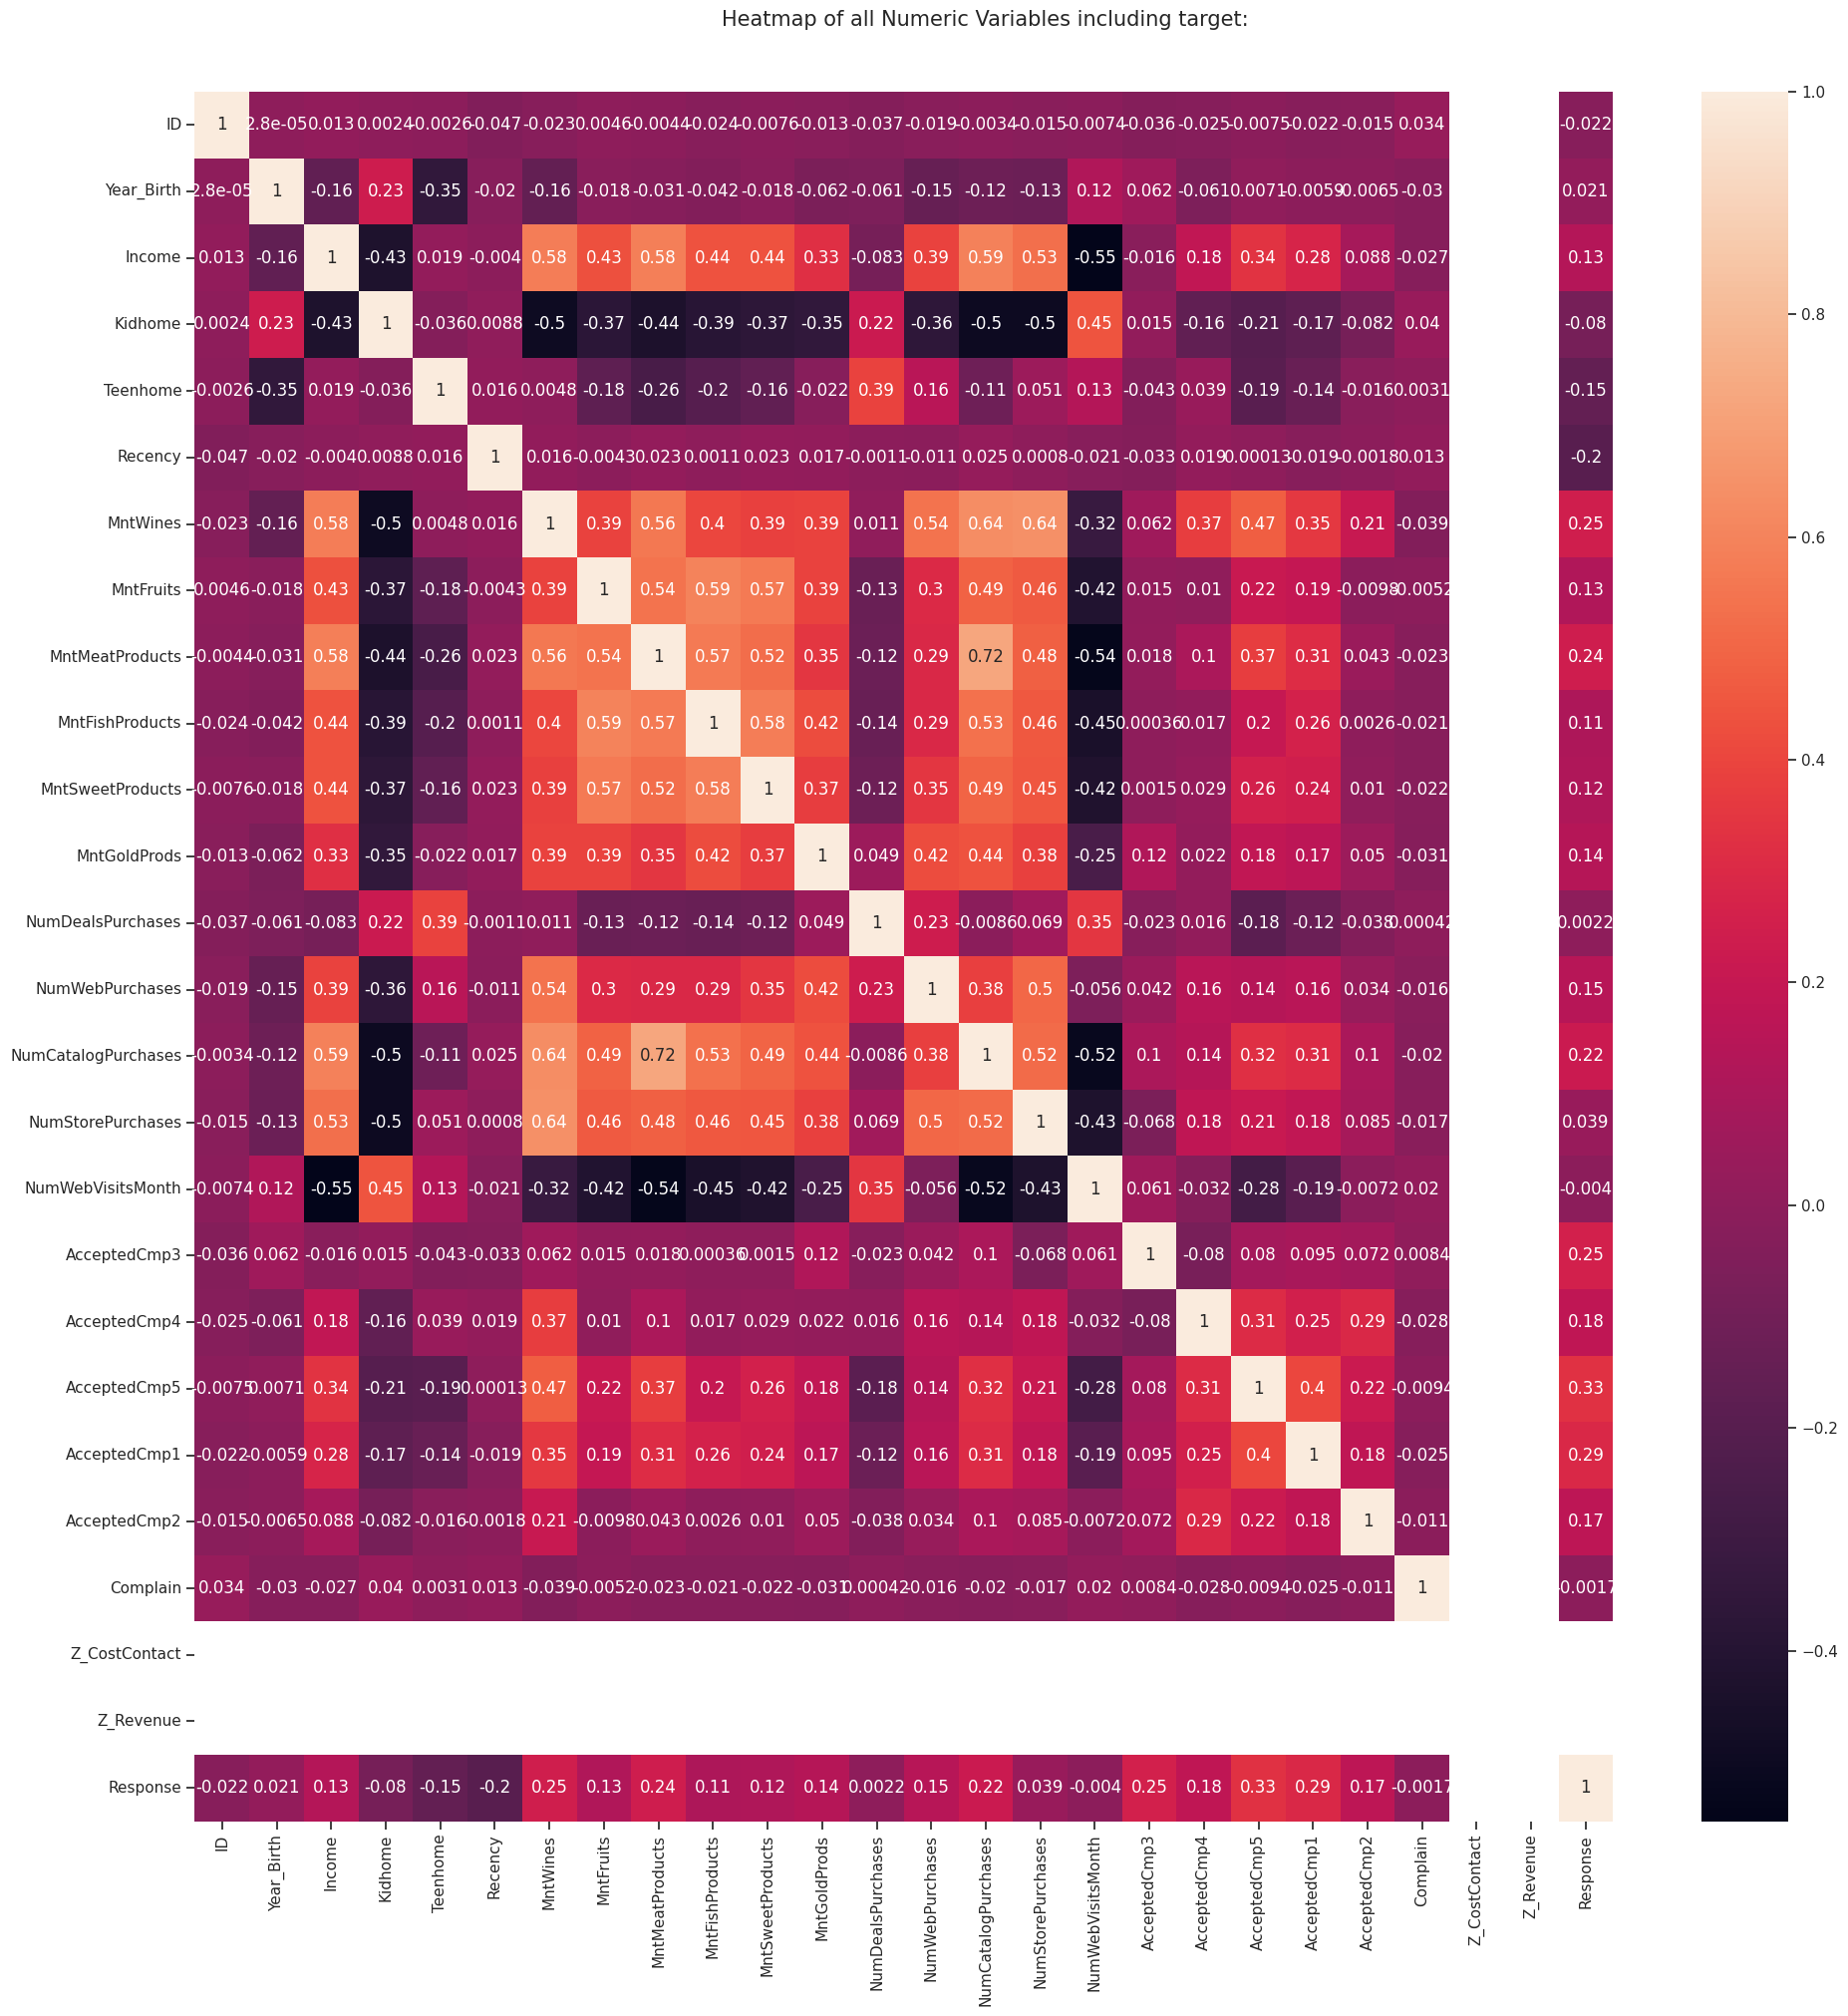

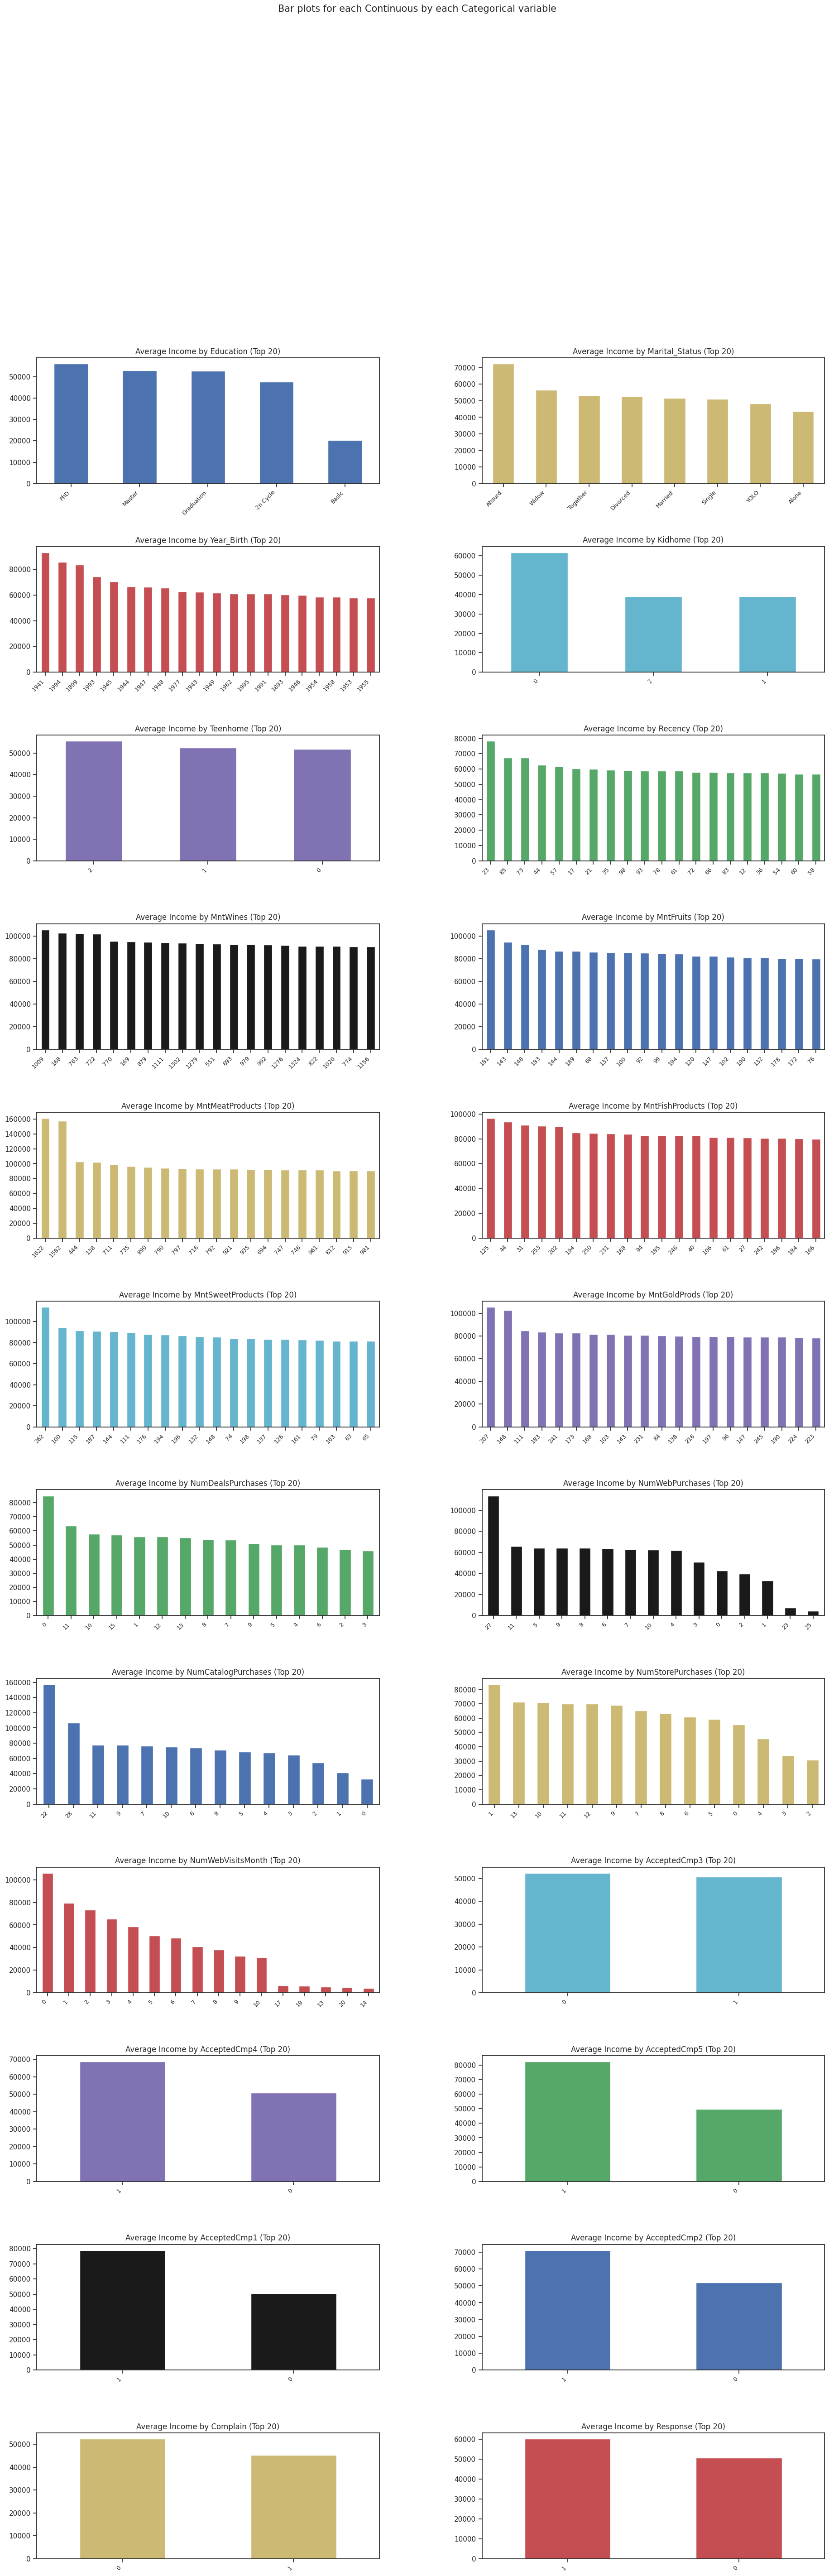

Could not draw wordcloud plot for Dt_Customer. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

ID    Year_Birth  Education  Marital_Status  Income   Kidhome  \
0      5524     1957     Graduation      Single     58138.0     0      
1      2174     1954     Graduation      Single     46344.0     1      
2      4141     1965     Graduation    Together     71613.0     0      
3      6182     1984     Graduation    Together     26646.0     1      
4      5324     1981            PhD     Married     58293.0     1      
...     ...         ...         ...            ...      ...      ...   
2235  10870     1967     Graduation     Married     61223.0     0      
2236   4001     1946            PhD    Together     64014.0     2      
2237   7270     1981     Graduation    Divorced     56981.0     0      
2238   8235     1956         Master    Together     69245.0     0      
2239   9405     1954            PhD     Married     52869.0     1      

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     04-09-2012    58        635       88            546         
1         1     08-03-2014    38         11        1              6         
2         0     21-08-2013    26        426       49            127         
3         0     10-02-2014    26         11        4             20         
4         0     19-01-2014    94        173       43            118         
...        ...         ...      ...       ...        ...              ...   
2235      1     13-06-2013    46        709       43            182         
2236      1     10-06-2014    56        406        0             30         
2237      0     25-01-2014    91        908       48            217         
2238      1     24-01-2014     8        428       30            214         
2239      1     15-10-2012    40         84        3             61         

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0           172                88              88              3           
1             2                 1               6              2           
2           111                21              42              1           
3            10                 3               5              2           
4            46                27              15              5           
...               ...               ...           ...                ...   
2235         42               118             247              2           
2236          0                 0               8              7           
2237         32                12              24              1           
2238         80                30              61              2           
2239          2                 1              21              3           

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            8                 10                   4           
1            1                  1                   2           
2            8                  2                  10           
3            2                  0                   4           
4            5                  3                   6           
...               ...                  ...                ...   
2235         9                  3                   4           
2236         8                  2                   5           
2237         2                  3                  13           
2238         6                  5                  10           
2239         3                  1                   4           

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             7                0             0             0        
1             5                0             0             0        
2             4                0             0             0        
3             6                0             0             0        
4             5                0             0             0        
...                 ...           ...           ...           ...   
2235          5                0        

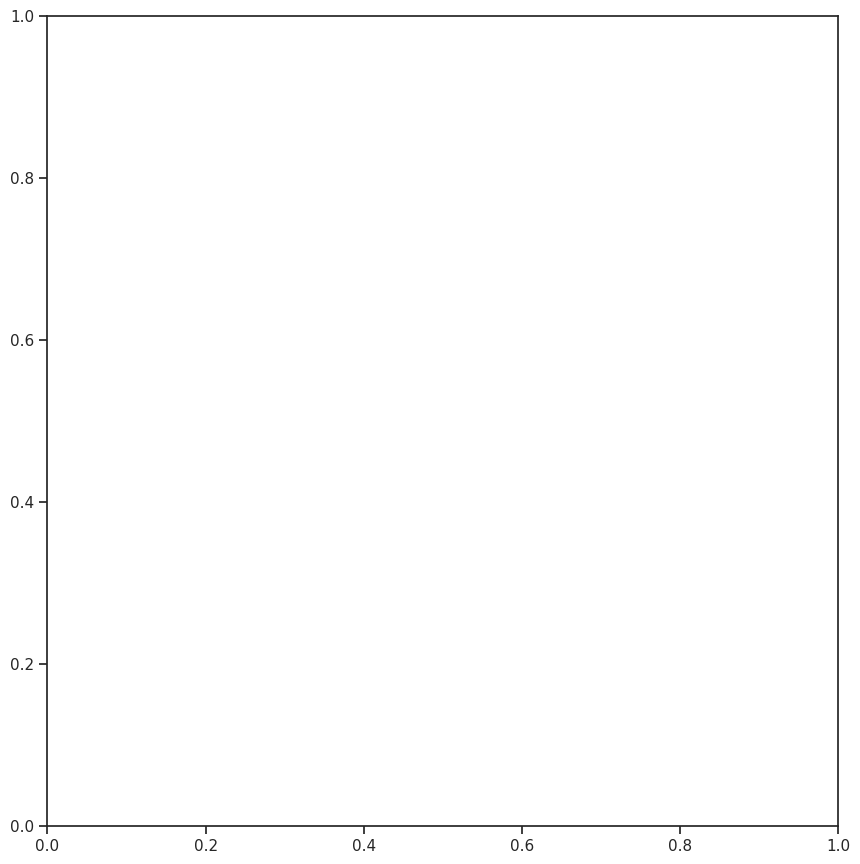

In [4]:

%matplotlib inline

!pip install autoviz==0.1.905 openpyxl --quiet

import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display
try:
    df = pd.read_csv("marketing_campaign.csv", sep="\t", encoding="latin1")
    if df.shape[1] == 1:  # Nếu đọc sai dạng TSV, fallback về CSV
        df = pd.read_csv("marketing_campaign.csv", encoding="latin1")
except:
    df = pd.read_csv("marketing_campaign.csv", encoding="latin1")

print("✅ Kích thước dữ liệu:", df.shape)
display(df.head())

AV = AutoViz_Class()
AV.AutoViz(
    filename="",        # không dùng file path
    dfte=df,            # dùng DataFrame đã load
    depVar="",          # không có biến mục tiêu
    header=0,
    verbose=1,          # hiện log
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=200
)
